### Calculate tissue specificity based on a gene expression matrix with tspex

In [31]:
import scanpy as sc
import tspex
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# file paths

path_mtx_celltype = "/staging/leuven/stg_00056/octopus/annotation/tau/matrix_avExp_cellType_snscRNA_brain.tsv"
path_ov_tfs = "/staging/leuven/stg_00056/octopus/annotation/tau/Ov_TF_detected.txt"
path_ncells = "/staging/leuven/stg_00056/octopus/annotation/tau/ncells_cellType_snscRNA_brain.tsv"
path_out_tau = "/staging/leuven/stg_00056/octopus/annotation/tau/tau.tsv"
path_ov_pcdhs = "/staging/leuven/stg_00056/octopus/annotation/tau/Ov_PCDH_detected.txt"
path_ov_genes = "/staging/leuven/stg_00056/octopus/annotation/tau/Ov_all_genes_detected.txt"

In [55]:
# load matrix file
mtx_avEx_Brain_celltypes =  pd.read_csv(path_mtx_celltype, sep='\t', index_col='gene_id')

In [56]:
# read TFs
tfs = np.genfromtxt(path_ov_tfs,dtype='str')

In [57]:
# read number of cells per gene
df_ncells =  pd.read_csv(path_ncells, sep='\t',index_col='gene_id')

In [82]:
# read PCDHs
pcdhs = np.genfromtxt(path_ov_pcdhs,dtype='str')

In [101]:
# read all genes
genes = np.genfromtxt(path_ov_genes,dtype='str')

In [58]:
tfs.shape

(1761,)

In [59]:
mtx_avEx_mouseBrain_celltypes.shape

(17947, 89)

In [60]:
df_ncells.shape

(17947, 1)

In [61]:
df_ncells.head()

,ncells
gene_id,
mt-ATP6,16733
LOC115208758,133
LOC115208759,74
LOC115208771,4513
LOC115208791,22


In [62]:
mtx_avEx_Brain_celltypes.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,gene_id.1
gene_id,,,,,,,,,,,,,,,,,,,,,
mt-ATP6,8.997630,9.310667,33.226891,13.639456,8.080074,18.601923,15.823158,13.256466,16.095652,18.966667,...,18.782609,9.930233,47.513514,9.827586,11.04,13.708333,11.470588,37.307692,9.307692,mt-ATP6
LOC115208758,0.005924,0.004000,0.015126,0.006803,0.005587,0.013462,0.008421,0.008621,0.002174,0.006667,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,LOC115208758
LOC115208759,0.001185,0.002667,0.005042,0.005102,0.001862,0.001923,0.008421,0.004310,0.002174,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,LOC115208759
LOC115208771,0.213270,0.334667,0.287395,0.520408,0.191806,0.328846,0.456842,0.400862,0.356522,0.351111,...,0.326087,0.488372,0.135135,0.379310,0.36,0.375000,0.176471,0.615385,0.538462,LOC115208771
LOC115208791,0.005924,0.001333,0.001681,0.001701,0.000000,0.001923,0.000000,0.000000,0.002174,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,LOC115208791


In [63]:
# subset matrix for TF
all_genes = mtx_avEx_Brain_celltypes.index
all_tfs = list(set(all_genes) & set(tfs))
tf_mtx_avEx_Brain_celltypes = mtx_avEx_Brain_celltypes.loc[all_tfs]

In [83]:
# subset matrix for PCDH
all_genes = mtx_avEx_Brain_celltypes.index
all_pcdhs = list(set(all_genes) & set(pcdhs))
tf_mtx_avEx_Brain_celltypes = mtx_avEx_Brain_celltypes.loc[all_pcdhs]

In [64]:
tf_mtx_avEx_Brain_celltypes.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,gene_id.1
gene_id,,,,,,,,,,,,,,,,,,,,,
LOC115210853,0.015403,0.013333,0.030252,0.001701,0.014898,0.015385,0.021053,0.004310,0.026087,0.011111,...,0.021739,0.046512,0.000000,0.000000,0.04,0.041667,0.000000,0.000000,0.000000,LOC115210853
LOC118760835,1.656398,1.058667,5.596639,2.493197,1.128492,2.163462,2.141053,1.648707,2.556522,1.808889,...,2.500000,1.209302,3.189189,1.448276,0.48,2.458333,4.529412,2.692308,2.615385,LOC118760835
LOC115224998,0.009479,0.020000,0.023529,0.008503,0.007449,0.003846,0.006316,0.002155,0.015217,0.002222,...,0.000000,0.000000,0.000000,0.000000,0.00,0.083333,0.000000,0.000000,0.000000,LOC115224998
LOC118768086,0.001185,0.002667,0.003361,0.003401,0.000000,0.003846,0.004211,0.000000,0.002174,0.004444,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.058824,0.000000,0.000000,LOC118768086
LOC118768290,0.003555,0.004000,0.005042,0.001701,0.000000,0.003846,0.000000,0.000000,0.004348,0.002222,...,0.000000,0.023256,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,LOC118768290


In [84]:
tf_mtx_avEx_Brain_celltypes.shape

(172, 88)

In [102]:
tso = tspex.TissueSpecificity(tf_mtx_avEx_Brain_celltypes, 'tau', log=False)

/data/leuven/329/vsc32990/miniconda3/envs/tau/lib/python3.7/site-packages/tspex/core/specificity_class.py:105: UserWarning: The input DataFrame contains non-numerical columns. These columns were removed.
  'The input DataFrame contains non-numerical columns. These columns were removed.'


In [103]:
tso.tissue_specificity.head()

gene_id
mt-ATP6         0.6630
LOC115208758    0.7778
LOC115208759    0.8057
LOC115208771    0.4640
LOC115208791    0.9478
dtype: float64

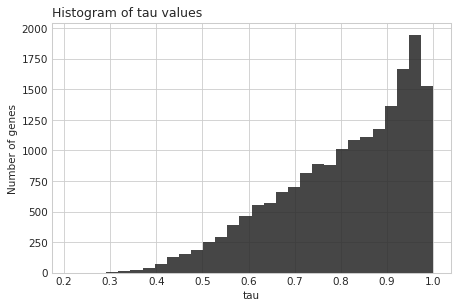

In [104]:
tso.plot_histogram()

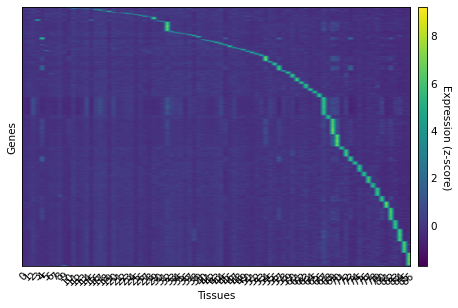

In [105]:
tso.plot_heatmap(threshold=0.8, sort_genes=True, use_zscore=True, gene_names=False)

In [106]:
tso.tissue_specificity.sort_values(ascending=False)

gene_id
LOC115221260    1.0000
LOC118766370    1.0000
LOC115213537    0.9999
LOC115213031    0.9999
LOC115213389    0.9998
                 ...  
LOC115209699    0.3138
LOC115212820    0.3115
LOC115225831    0.2992
LOC115210674    0.2766
LOC115220933    0.2131
Length: 17947, dtype: float64

/data/leuven/329/vsc32990/miniconda3/envs/tau/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ncells'>

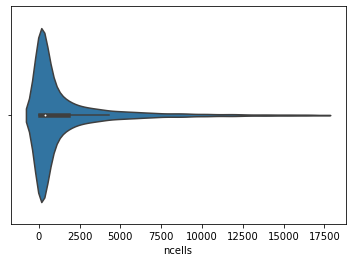

In [107]:
sns.violinplot(df_ncells.ncells)

In [73]:
# visualize genes that are expressed in more than 20 cells
thrncells = 20
sel_genes = df_ncells.loc[ df_ncells.ncells > thrncells].index
sel_tfs = list(set(sel_genes) & set(all_tfs))

In [93]:
# visualize genes that are expressed in more than 20 cells
thrncells = 20
sel_genes = df_ncells.loc[ df_ncells.ncells > thrncells].index
sel_pcdhs = list(set(sel_genes) & set(all_pcdhs))

In [108]:
# visualize genes that are expressed in more than 20 cells
thrncells = 20
sel_genes = df_ncells.loc[ df_ncells.ncells > thrncells].index
sel_allgenes = list(set(sel_genes) & set(all_genes))

In [109]:
tau = tso.tissue_specificity.sort_values(ascending=False)

In [110]:
tau.loc[sel_allgenes].sort_values(ascending=False)

gene_id
LOC115213031       0.9999
LOC115213389       0.9998
LOC115217201       0.9997
LOC115213516       0.9997
novelGene-34478    0.9997
                    ...  
LOC115209699       0.3138
LOC115212820       0.3115
LOC115225831       0.2992
LOC115210674       0.2766
LOC115220933       0.2131
Length: 16348, dtype: float64

In [95]:
tau.loc[sel_pcdhs].sort_values(ascending=False)

gene_id
LOC115218977    0.9968
LOC115218969    0.9950
LOC115218755    0.9932
LOC118765869    0.9928
LOC118766058    0.9820
                 ...  
LOC115218748    0.4879
LOC115218960    0.4564
LOC115219387    0.4354
LOC115219433    0.4337
LOC115219494    0.3677
Length: 168, dtype: float64

In [111]:
df_sel_ncells = df_ncells.loc[tau.index]

In [112]:
df_out_tau = pd.DataFrame(
    {
        'gene_id': tau.index,
        'tau': tau,
        'ncells': df_sel_ncells.ncells
    }
)

In [113]:
df_out_tau.to_csv(path_out_tau, sep='\t', index=False)

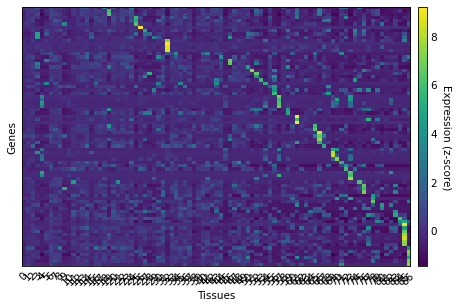

In [99]:
tso.plot_heatmap(threshold=0.8, sort_genes=True, use_zscore=True, gene_names=False)

### Calculate TF family enrichment within the rank of tau (GSEA with GSEAPY)

In [4]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [123]:
# file paths
path_out_tau = "/staging/leuven/stg_00056/octopus/annotation/tau/tau.tsv"
path_ov_tf_gmt = "/staging/leuven/stg_00056/octopus/annotation/tau/gene_sets.gmt"
path_out_dir = "/staging/leuven/stg_00056/octopus/annotation/tau/gsea_tau_cellType_TF_family"

# min cells
min_cells = 20

In [124]:
# or assign a dataframe, or Series to ssgsea()
ssdf = pd.read_csv(path_out_tau, sep="\t", index_col='gene_id')
ssdf.head()

,tau,ncells
gene_id,,
LOC115219332,0.9982,4292
LOC115228477,0.9959,8
LOC118768376,0.9956,8
LOC118768568,0.9952,8
LOC115230954,0.9938,41


In [125]:
# filter by min cells
ssdf= ssdf.loc[ ssdf.ncells >= min_cells]

# drop ncells column
ssdf = ssdf.drop('ncells', axis=1)
ssdf.head()

,tau
gene_id,
LOC115219332,0.9982
LOC115230954,0.9938
LOC115216493,0.9934
LOC115210425,0.9934
LOC115226888,0.9931


In [126]:
ssgs = gp.ssgsea(data=ssdf,
                       gene_sets=path_ov_tf_gmt,
                       outdir=path_out_dir + '/ssgsea_report',
                       scale=False, # set scale to False to get real original ES
                       permutation_num=0, # skip permutation procedure, because you don't need it
                       no_plot=False,
                       processes=4, seed=10,
                       format='png')

In [127]:
# normalized es save to res2d attri
# one sample input
# NES
ssgs.res2d.sort_index().head()

,tau
Term|NES,
HMG,0.030330
Homeobox,0.639425
MYB,-0.360575
TF_bZIP,-0.013782
THR-like,-0.137799


In [129]:
# ES
# convert dict to DataFrame
es = pd.DataFrame(ssgs.resultsOnSamples)
es.sort_index().head()

,tau
Term|ES,
HMG,26.805404
Homeobox,565.121738
MYB,-318.675325
TF_bZIP,-12.180852
THR-like,-121.785923


In [130]:
ssgs.res2d.sort_values('tau', ascending=False)

,tau
Term|NES,
Homeobox,0.639425
bHLH,0.370446
zf-C2H2,0.102001
zf-H2C2_2,0.058935
HMG,0.030330
TF_bZIP,-0.013782
THR-like,-0.137799
MYB,-0.360575


In [ ]:
#calculate pre-rank

In [133]:
# assign rank as index
ssdf = pd.read_csv(path_out_tau, sep="\t")
ssdf = ssdf.sort_values('tau', ascending=False)

# filter by min cells
ssdf= ssdf.loc[ ssdf.ncells >= min_cells]
# drop ncells column
ssdf = ssdf.drop('ncells', axis=1)

ssdf

,gene_id,tau
0,LOC115219332,0.9982
4,LOC115230954,0.9938
6,LOC115210425,0.9934
5,LOC115216493,0.9934
7,LOC115226888,0.9931
...,...,...
1756,LOC115211127,0.4223
1757,LOC115221753,0.4207
1758,LOC115212964,0.4025
1759,LOC115222634,0.4011


In [135]:
# run prerank
# enrichr libraries are supported by prerank module. Just provide the name
# use 4 process to acceralate the permutation speed

# note: multiprocessing may not work on windows
pre_res = gp.prerank(rnk=ssdf, gene_sets=path_ov_tf_gmt,
                     processes=4,
                     permutation_num=100, # reduce number to speed up testing
                     outdir=path_out_dir + '/prerank_report', format='png', seed=6)

In [136]:
pre_res.res2d.sort_values('fdr', ascending=True)

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Homeobox,0.528182,3.450631,0.000000,0.000000,81,55,LOC118763461;LOC115210569;LOC115219954;LOC1152...,LOC118763461;LOC115210569;LOC115219954;LOC1152...
MYB,-0.358089,-2.086152,0.000000,0.000000,21,19,LOC115224363;LOC115229010;LOC115223855;LOC1187...,LOC115229010;LOC115223855;LOC118764264;LOC1152...
bHLH,0.357804,2.321985,0.000000,0.000000,57,44,LOC115230954;LOC115216493;LOC115210657;LOC1152...,LOC115230954;LOC115216493;LOC115210657;LOC1152...
zf-C2H2,0.124326,1.202892,0.212766,0.318688,213,187,LOC115219332;LOC115226888;LOC115220746;LOC1152...,LOC115219332;LOC115226888;LOC115220746;LOC1152...
TF_bZIP,-0.196768,-1.204417,0.238095,0.343511,27,22,LOC115216710;LOC115222465;LOC115231435;LOC1152...,LOC115222626;LOC115216400;LOC115212294;LOC1152...
THR-like,-0.220163,-0.982711,0.535714,0.465649,18,15,LOC115221570;LOC115212410;LOC115224978;LOC1152...,LOC115216876;LOC115232418;LOC115214890;LOC1152...
HMG,0.079774,0.450579,1.000000,0.998243,45,32,LOC115229011;LOC115209422;LOC115227536;LOC1152...,LOC115229011;LOC115209422;LOC115227536;LOC1152...


In [137]:
res_df = pre_res.res2d.sort_values('fdr', ascending=True)